<a href="https://www.kaggle.com/code/sridharparshana/imdb-top-250-movies-eda?scriptVersionId=114625925" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [35]:
#Import the essentail libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
#Get the data
 
data=pd.read_csv('/kaggle/input/imdb-movies-top250/IMDB Top 250 Movies.csv')

In [37]:
#Let's do some statical analysis
data.describe(include='all')

,Movie_Name,Release_date,Rating
count,250,250.000000,250.000000
unique,250,NaN,NaN
top,The Shawshank Redemption,NaN,NaN
freq,1,NaN,NaN
mean,NaN,1986.488000,8.252800
std,NaN,25.225287,0.236125
min,NaN,1921.000000,8.000000
25%,NaN,1966.250000,8.100000
50%,NaN,1994.000000,8.200000
75%,NaN,2006.750000,8.400000


In [38]:
#Now let's see for any null values
data.isnull().sum()

Movie_Name      0
Release_date    0
Rating          0
dtype: int64

In [39]:
#Now see the data types of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie_Name    250 non-null    object 
 1   Release_date  250 non-null    int64  
 2   Rating        250 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [40]:
#The date column is int64 that's need to correct and make date type
data['Release_date']=pd.to_datetime(data['Release_date'],format='%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Movie_Name    250 non-null    object        
 1   Release_date  250 non-null    datetime64[ns]
 2   Rating        250 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.0+ KB


In [41]:
data.head(10)

,Movie_Name,Release_date,Rating
0,The Shawshank Redemption,1994-01-01,9.2
1,The Godfather,1972-01-01,9.2
2,The Dark Knight,2008-01-01,9.0
3,The Godfather Part II,1974-01-01,9.0
4,12 Angry Men,1957-01-01,9.0
5,Schindler's List,1993-01-01,8.9
6,The Lord of the Rings: The Return of the King,2003-01-01,8.9
7,Pulp Fiction,1994-01-01,8.8
8,The Lord of the Rings: The Fellowship of the Ring,2001-01-01,8.8
9,"Il buono, il brutto, il cattivo",1966-01-01,8.8


### EDA

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:>

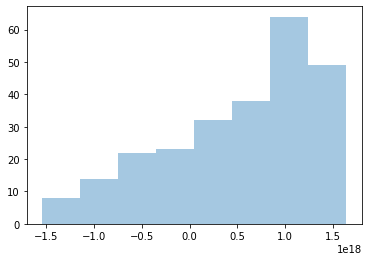

In [42]:
#Now let's see how values actually spread
sns.distplot(x=data['Release_date'],kde=False)

<AxesSubplot:>

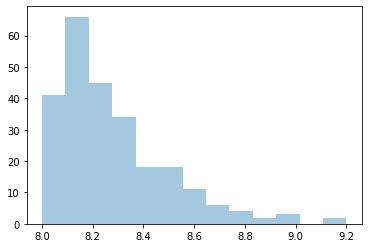

In [43]:
#Now plot the Rating column
sns.distplot(x=data['Rating'],kde=False)

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

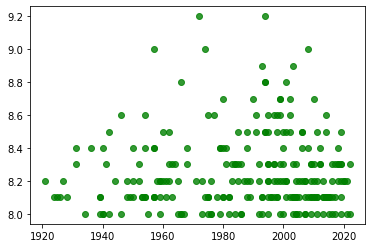

In [44]:
#It is not need here but let's check for relationship between both Rating and Release date
sns.regplot(x='Release_date',y='Rating',data=data,scatter_kws={'color':'green'},line_kws={'color':'blue'})

In [45]:
#let's See the 10 most famous movies of all time
fig=px.bar(data.groupby('Movie_Name',as_index=False)['Rating'].mean().sort_values(by='Rating',ascending=False).head(10),
           x='Movie_Name',y='Rating',color='Movie_Name',labels={'Movie_Name':'Movies','Rating':'Rating'},
           template='ggplot2',text='Movie_Name',title='<b> Top 10 Highest Rating Movies of all Time')
fig.show()

In [46]:
#Now let's see in which Year most of the movies goes hit
fig=px.pie(data.groupby('Release_date',as_index=False)['Rating'].count().sort_values(by='Rating',ascending=False).head(5),
           names='Release_date',values='Rating',color='Release_date',
           labels={'Release_date':'Date of Release ','Rating':'Count'},template='ggplot2',
           title='<b>Top 5 Years with most hit movies')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',
                                          y=1.02,xanchor='right',x=1))

In [47]:
#Let's see which year has more rating stars
fig=px.pie(data.groupby('Release_date',as_index=False)['Rating'].mean().sort_values(by='Rating',ascending=False).head(5),
           names='Release_date',values='Rating',color='Release_date',hole=0.5,
           labels={'Release_date':'Date Release','Rating':'Rating'},template='plotly',
           title='<b>Top 5 Years with most Average Rating Movies')
fig.update_layout(title_x=0.5)